In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

# Remove warning labels
import warnings
warnings.filterwarnings('ignore')

# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements, graphs will be graded both on correctness (did you plot the right hting) as well as on effectiveness (does this graph demonstrate the principles we learned in our data viz lectures).
- CLEARLY mark where you are answering each question.
- Show all code necessary for the analysis, but remove superfluous code

---
## 1

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), build a linear regression model to predict *reaction time* based on all the other variables. 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

Markdown Answers

(feel free to answer questions ALL in a single markdown cell, or in multiple markdown cells interspersed with the code. Just make sure to clearly mark where you're answering each question.)

In [2]:
# create a data frame of the imported data for analysis
DF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")
DF.head()

,age,boredom_rating,risk_propensity,height,left_handed,reaction_time
0,32,15.75,14,151.99,0,1435.700562
1,48,97.28,4,162.39,0,436.858176
2,35,65.73,18,148.42,1,878.039528
3,33,40.30,13,121.12,0,1056.733539
4,37,82.32,15,139.74,0,633.438797


In [3]:
# Identify outcome variable and perdictor variables
#outcome = ["reaction_time"]
predictors = ["age", "boredom_rating", "risk_propensity", "height", "left_handed"]



#### A. Use an 80/20 train test split for model validation and make sure you z score your continuous variables   

# Train Test Split Cross Validation - *80/20 Split*

In [4]:
# create a TTS with a 80/20 split 
X_train, X_test, y_train, y_test = train_test_split(DF[predictors], DF["reaction_time"], test_size=0.2)

In [5]:
# The predictors data set before Z scoring the continuous variables
X_train.head()

,age,boredom_rating,risk_propensity,height,left_handed
138,35,7.83,7,158.22,0
137,34,27.44,16,169.39,0
227,34,69.24,17,154.79,0
532,38,30.70,14,179.73,0
400,35,3.47,20,185.57,0


In [6]:
# Z score the continuous variables 
cont = ["age", "boredom_rating", "risk_propensity", "height"]
zScore = StandardScaler()
zScore.fit(X_train[cont])
X_train[cont] = zScore.transform(X_train[cont])
X_test[cont] = zScore.transform(X_test[cont]) # why do we zScore the test data?

In [7]:
# The train data set after Z scoreing the continuous variables
X_train.head()

,age,boredom_rating,risk_propensity,height,left_handed
138,0.013111,-1.473468,-1.699163,-0.071569,0
137,-0.184795,-0.788716,0.467292,0.496449,0
227,-0.184795,0.670878,0.708010,-0.245992,0
532,0.606829,-0.674881,-0.014142,1.022259,0
400,0.013111,-1.625712,1.430162,1.319236,0


In [8]:
# Create a Linear Regression Model based on the training data set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
# Create some predicted values of reaction time based on our models projections
y_pred = lr.predict(X_test)
#y_pred[1:10]
#y_test

#### B. Check the linearity assumption for your continuous variables using ggplot. Discuss in detail what you are checking for and specifically what you see for this model.


# Linearity

In [10]:
# Linearity of continuous Variables 
#Continuous Variables are "age", "boredom_rating", "risk_propensity", "height"

#### Age vs. Reaction Time

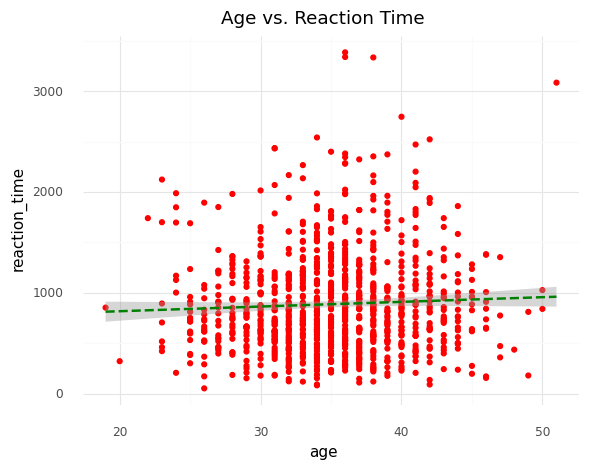

<ggplot: (146152046836)>

In [11]:
# Checking the linearity of age to reaction time
(ggplot(DF, aes(x = "age", y = "reaction_time")) + geom_point(color = "red") + theme_minimal()
 + ggtitle("Age vs. Reaction Time") + stat_smooth(color = "green", linetype = "dashed")
)

#### Comment on relationship between age and reation time

What we would like to see from the predictive parameter age is some kind of linear relationship between the parameter and the outcome variable (reaction_time). However, the graph of *Age vs. Reaction time* appears to have no linear trend meaning that our assumption of linearity between age and reation time is false. We can see by the green line that there is no linear relationship present that follows closely with the green line.

#### Boredom Rating vs. Reaction Time

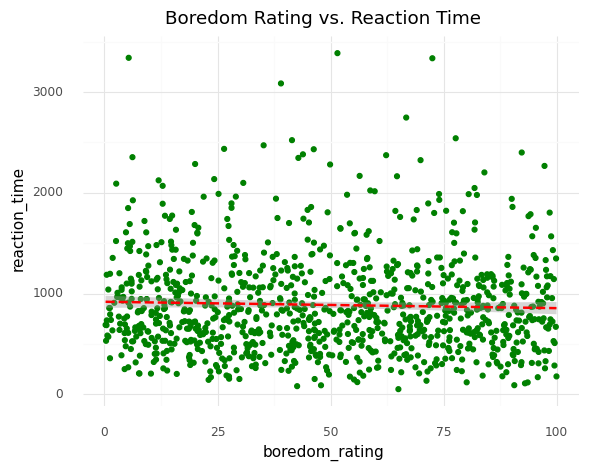

<ggplot: (146152559701)>

In [12]:
# Checking the linearity of boredom rating to reaction time
(ggplot(DF, aes(x = "boredom_rating", y = "reaction_time")) + geom_point(color = "green") + theme_minimal()
  + ggtitle("Boredom Rating vs. Reaction Time") + geom_smooth(method = "lm", color = "red", linetype = "dashed")
)

#### Comment on relationship between boredom rating and reaction time
Similarly to age, what we would like to see from the predictive parameter, boredom rating, is some kind of linear relationship between the parameter and the outcome variable (reaction_time). However, the graph of *Boredom Rating vs. Reaction Time* appears to have no linear trend meaning that our assumption of linearity between boredom rating and reation time is false, as evidenced by the red dotted line. 

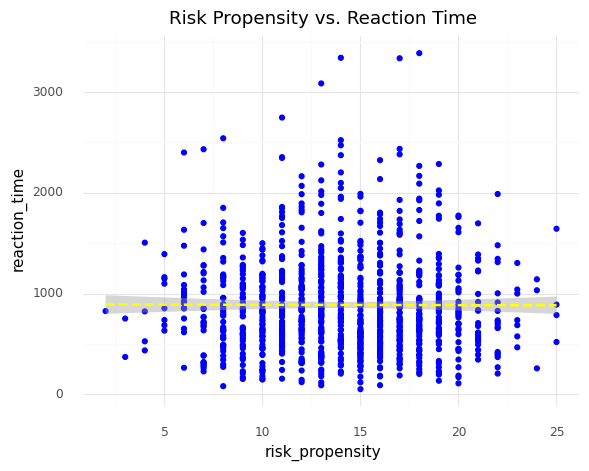

<ggplot: (146152526373)>

In [13]:
# Checking the linearity of risk propensity to reaction time
(ggplot(DF, aes(x = "risk_propensity", y = "reaction_time")) + geom_point(color = "blue") + theme_minimal()
+ ggtitle("Risk Propensity vs. Reaction Time")
+ geom_smooth(method = "lm", color = "yellow", linetype = "dashed")
 #+ stat_smooth(color = "yellow", linetype = "dashed")
)

#### Comment on relationship between risk propensity and reaction time

Much like the previous graphs, what we would like to see from the predictive parameter risk propensity is some kind of linear relationship between the parameter and the outcome variable (reaction_time). However, the graph of *Risk Propensity vs. Reaction Time* appears to have no linear trend meaning that our assumption of linearity between risk propensity and reation time is false.

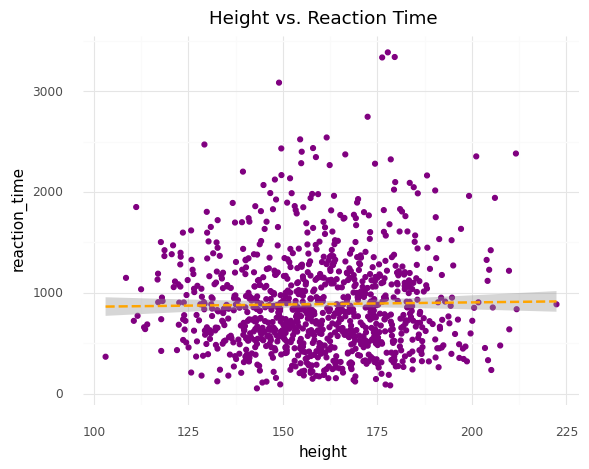

<ggplot: (146152565351)>

In [14]:
# Checking the linearity of height to reaction time
(ggplot(DF, aes(x = "height", y = "reaction_time")) + geom_point(color = "purple") + theme_minimal()
 + ggtitle("Height vs. Reaction Time")
+ geom_smooth(method = "lm", color = "orange", linetype = "dashed")
)

#### Comment on relationship between height and reaction time

What we would like to see from this final graph is that the predictive parameter height, is some kind of linear relationship between the parameter and the outcome variable (reaction_time). However, the graph of *height vs. reaction time* appears to have no linear trend meaning that our assumption of linearity between height and reation time is false. The final graph *height vs. reaction time* shows that of our predictive parameters non of them have any significant relationship with reaction time.

### Conclusions about relationships of the predictive parameters and the outcome variable

From the graphs above we can see that there is no linear relationship between any of the predictive parameters and the outcome variable in quaetion, reaction time. In fact there appears to be no significant relationship of any kind between the predictive parameters and the outcome variable. This will likely negatively effect our regression model when it comes to predicting accurate future outcomes.

#### C. Check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. Discuss in detail what you are checking for and what you see for this model.


# Heteroskedasticity

In [15]:
# create assumption data frame fore use in residual plot
assump = pd.DataFrame({ "Error" : y_test - y_pred,
                        "Predicted": y_pred
})

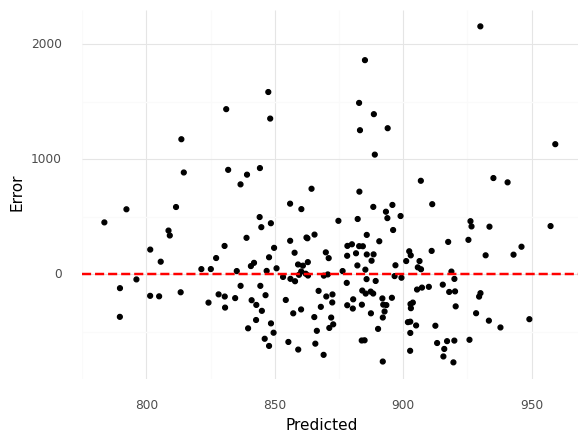

<ggplot: (146153782902)>

In [16]:
# Residual Plot 
(ggplot(assump, aes(x = "Predicted", y = "Error")) + geom_point() + theme_minimal()
 + geom_hline(yintercept = 0, linetype = "dashed", color = "red", size = 1)
)
# put a line at zero

#### Comment on Residuals Graph

The spread appears to be uneven with more values appearing above the red dotted line centered at zero. Additionally most of our extreme points are in the upper right of the residual graph, meaning that the error is not symmetric around zero. The uneven spread of the graph means that there is a lot of error in our linear regression model.

What we would like to see is majority of our points on the residual graph appearing around the red line centered at zero. The farther away the points are from the red line, increases our possibilities or recieveing inaccurate predictions of future outcomes. 

#### D. Plot the actual vs. predicted reaction times, as well as print out the mean absolute error and $R^2$ for your model for both <it>train</it> and <it>test</it>. How well did your model do based on these metrics, and how can you tell?


# Actual vs. Predicted Recation Times

In [17]:
AvP = pd.DataFrame({ "Actual": y_test,
                    "Predicted" : lr.predict(X_test)
})
AvP.head()

,Actual,Predicted
453,1608.942931,864.329481
515,203.869061,915.662240
926,1157.482865,839.017819
574,492.964193,902.765163
967,865.113561,835.222551


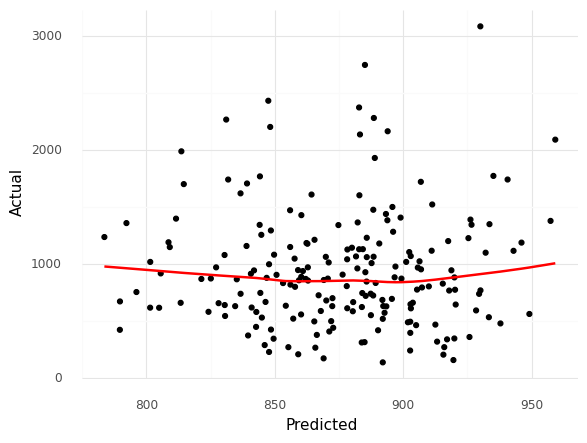

<ggplot: (146152043548)>

In [18]:
(ggplot(AvP, aes(x = "Predicted", y = "Actual")) + geom_point() + theme_minimal() 
 + stat_smooth(color = "red")
)

# Mean Absolute Error - *Training and Testing set*

In [19]:
# Mean Squared Error of training set
mae_training = mean_absolute_error(y_train, lr.predict(X_train))
mae_training

364.2584173330717

In [20]:
# Mean Squared Error of testing set
mae_testing = mean_absolute_error(y_test, lr.predict(X_test))
mae_testing

378.4734980063648

In [21]:
# difference between mse_training and mse_testing
mae_training - mae_testing

-14.21508067329313

# Mean Squared Error - *Training and Testing set*

In [22]:
# Mean Squared Error of training set
mse_training = mean_squared_error(y_train, lr.predict(X_train))
mse_training

229291.4345754643

In [23]:
# Mean Squared Error of testing set
mse_testing = mean_squared_error(y_test, lr.predict(X_test))
mse_testing

265633.38732690853

In [24]:
# difference between mse_training and mse_testing
mse_training - mse_testing

-36341.952751444216

# R-Squared - *Traning and Testing sets*

In [25]:
# r2 of the training set
r2_training = r2_score(y_train, lr.predict(X_train))
r2_training

0.005174594685922296

In [26]:
# r2 of the testing set
r2_testing = r2_score(y_test, lr.predict(X_test))
r2_testing

-0.024847436528064426

#### Comment on the effectiveness of your model

Unfortunatly, my model did not do well with the meterics provided. With the $r^2$ values of both the training and testing set being close to zero, my model is a highly insufficeint and is an unreliable predictor of the reaction time of the patient. My $r^2$ is a great indicator of the preformance of my model but also my mae and mse are large which indicates on average my model has large inaccuracies in predicting proper outcomes.

## E. Is your model overfit? How can you tell?


#### Comment on Overfitting 

Our model is overfitting slightly, because the value of the mean squared error of the training set data is slightly larger than the mean squared error of the test set data. But the difference is not too large that we should be concerned about overfitting. The same is true for the mean absolute error. What both Mean Absolute Error and Mean Squared Error are showing is our average magnitude of the errors in our predictive set of data. Therefore, with such a small amount of difference between the mse/mae of the training set and the testing set, respectfully, we should not be so concered with overfitting.

## F. Make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient).

# Coefficients

In [27]:
# Create a new data frame of the coefficients of the linear model
coef = pd.DataFrame({ "Coef" : lr.coef_, 
                     "Names" : predictors})

#coef = coef.append({ "Coef" : lr.intercept_, "Names" : "intercept"}, ignore_index = True)

coef

,Coef,Names
0,18.127619,age
1,-24.590260,boredom_rating
2,3.524266,risk_propensity
3,16.789586,height
4,-6.621144,left_handed


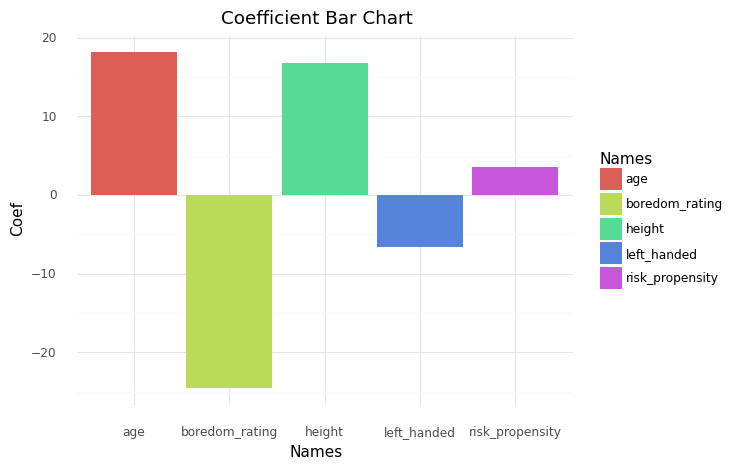

<ggplot: (146153784808)>

In [28]:
# Create a bar chart
(ggplot(coef, aes(x = "Names", y = "Coef", fill = "Names")) + stat_summary(geom = "bar")
 + ggtitle("Coefficient Bar Chart") + theme_minimal()
)